In [3]:
# Install necessary libraries if not already installed
!pip install numpy networkx matplotlib pandas seaborn



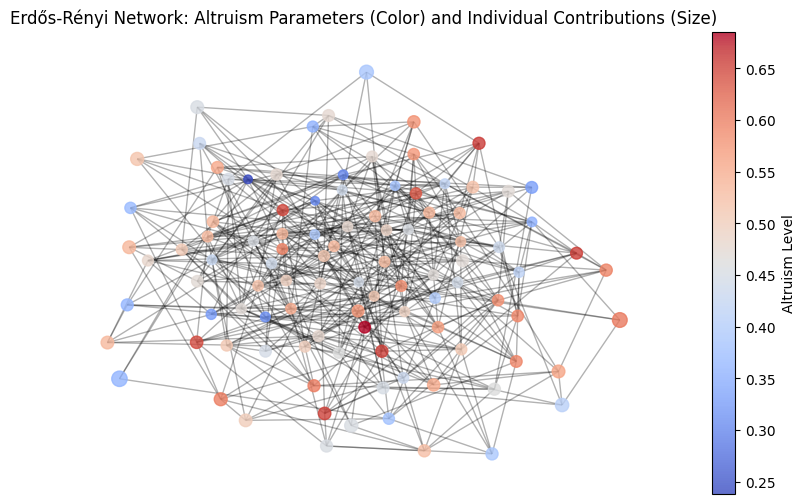

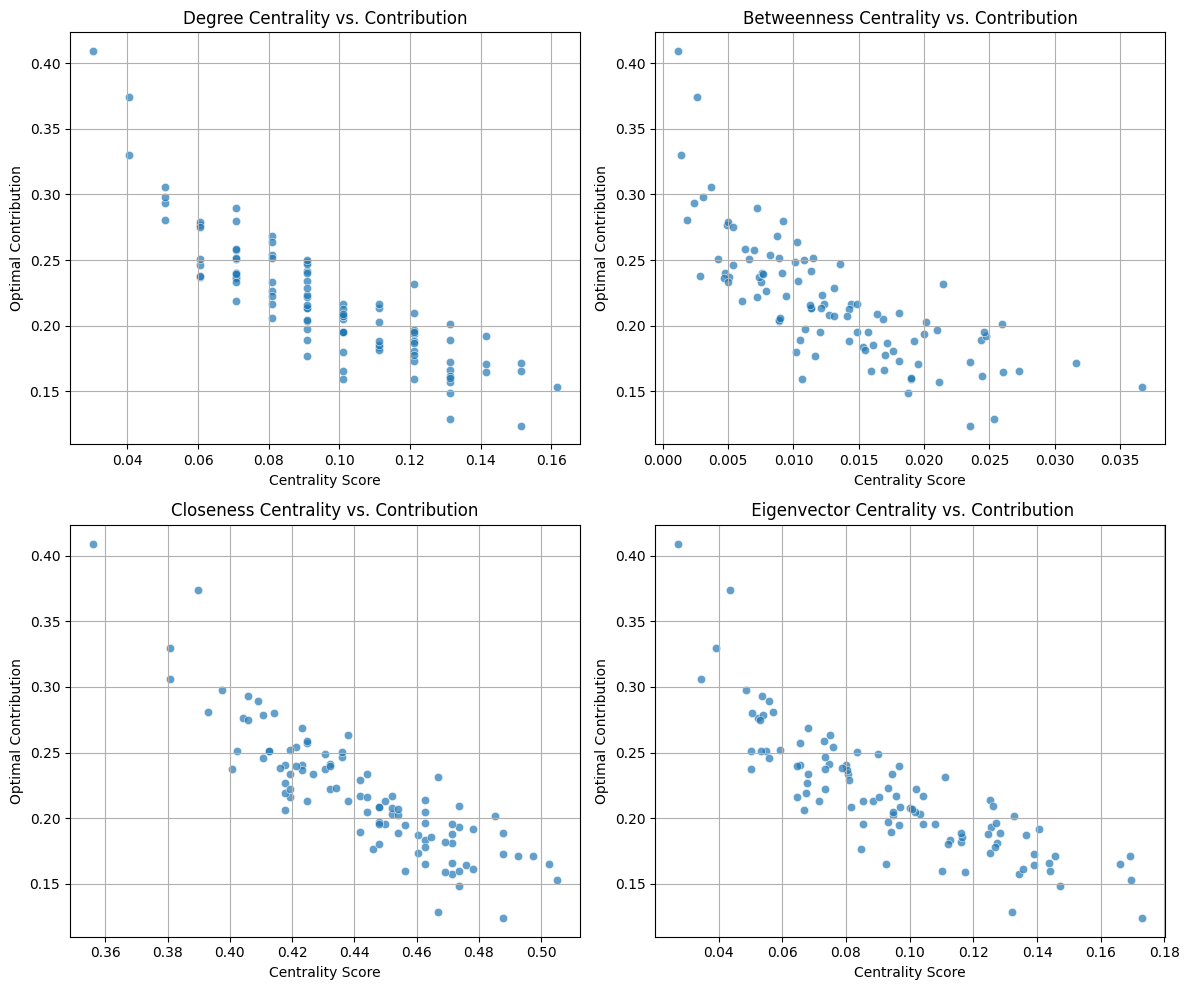

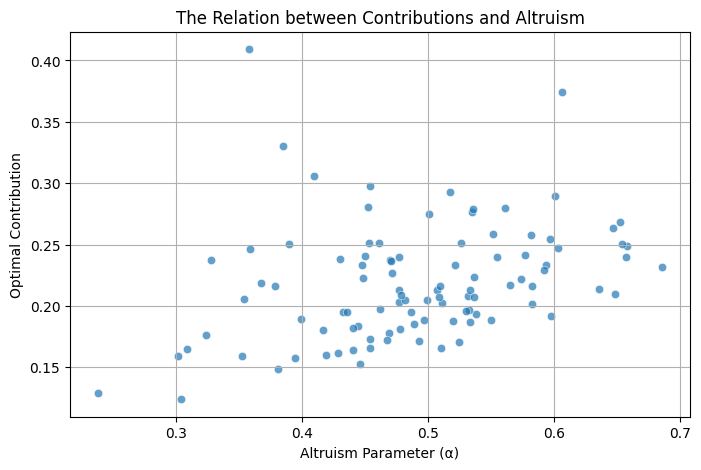

<Figure size 800x500 with 0 Axes>

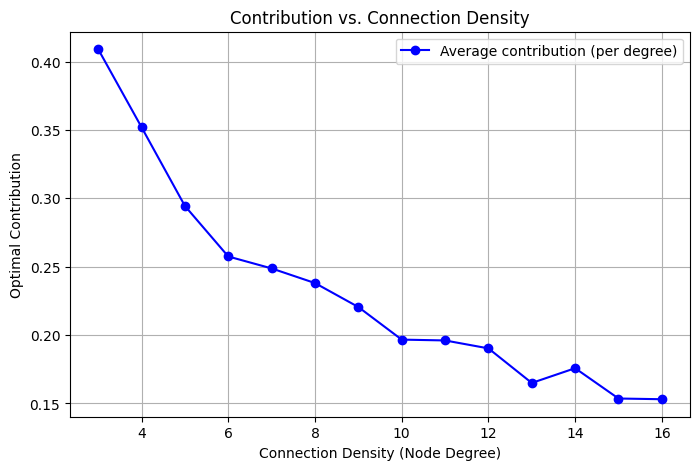

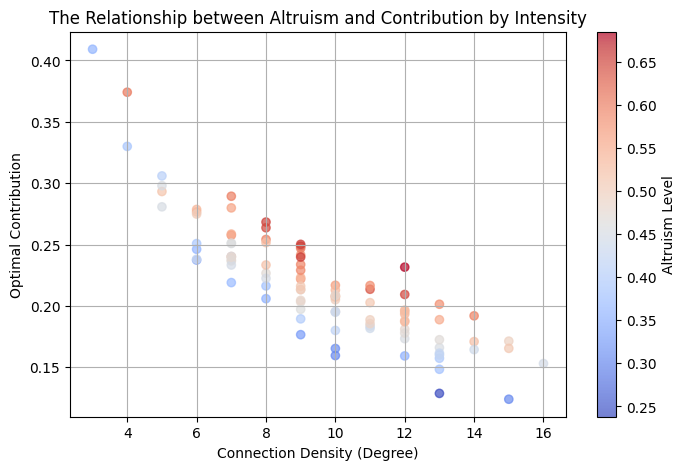

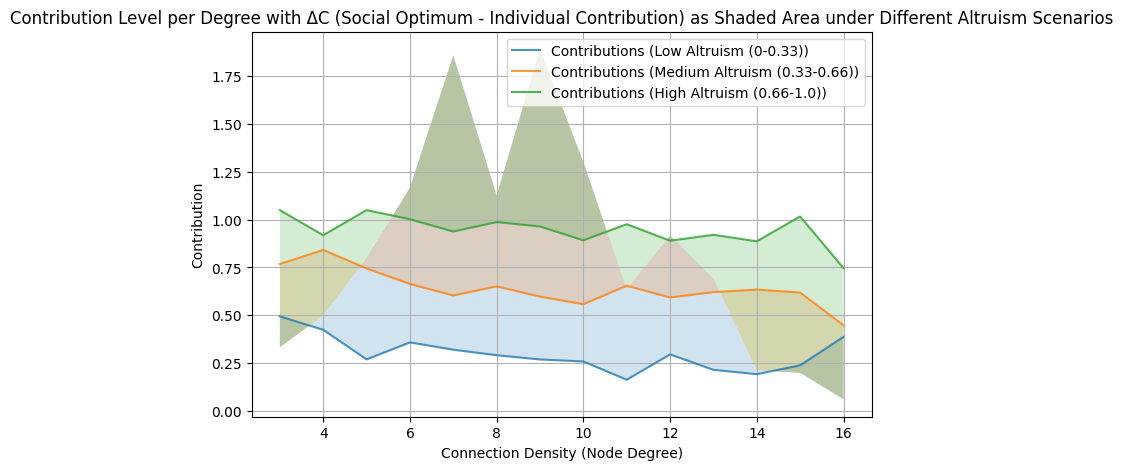

In [2]:
# Import required libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Model Parameters
n = 100  # Number of players (nodes in the network)
theta = 2  # Cost function exponent
beta = 2  # Public good multiplier
alpha_mean = 0.5  # Mean altruism parameter
alpha_std = 0.1  # Standard deviation of altruism parameter
epsilon = 1e-5  # Convergence threshold
max_iter = 1000  # Maximum number of iterations

# Generate Erdős-Rényi graph (random network)
p = 0.1  # Probability of edge creation
network = nx.erdos_renyi_graph(n, p, seed=42)
adj_matrix = nx.to_numpy_array(network)  # Convert to adjacency matrix

# Player parameters
e = np.ones(n)  # Initial income (normalized to 1 for simplicity)
alpha = np.random.normal(alpha_mean, alpha_std, n)  # Altruism parameters
alpha = np.clip(alpha, 0, 1)  # Ensuring altruism values are between 0 and 1
degrees = adj_matrix.sum(axis=1)  # Node degrees

# Iterative Best Response Nash Equilibrium Calculation
c_fp = np.zeros(n)  # Initialize with zeros
c_new = np.zeros_like(c_fp)

for iteration in range(max_iter):
    for i in range(n):
        neighbor_contributions = adj_matrix[i, :] @ c_fp  # Sum of neighbors' contributions
        if degrees[i] > 0:
            c_new[i] = ((beta / (theta * degrees[i])) * (1 + alpha[i] * neighbor_contributions)) ** (1 / (theta - 1))
        else:
            c_new[i] = 0

    # Check for convergence
    if np.linalg.norm(c_new - c_fp) < epsilon:
        break

    c_fp = c_new.copy()

# Store results
results_df = pd.DataFrame({
    "Player": np.arange(n),
    "Degree": degrees,
    "Alpha": alpha,
    "Optimal Contribution": c_fp
})


### 1. Visualization: Erdős-Rényi Network with Altruism (Node Color) and Contributions (Node Size)
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(network, seed=42)
# Draw the network edges first
nx.draw_networkx_edges(network, pos, alpha=0.3)
# Use plt.scatter instead of nx.draw for nodes (this allows for a colorbar)
sc = plt.scatter(
    [pos[i][0] for i in range(n)],
    [pos[i][1] for i in range(n)],
    c=alpha, s=c_fp * 300, cmap=plt.cm.coolwarm, alpha=0.8
)
# Add colorbar correctly
plt.colorbar(sc, label="Altruism Level")
plt.title("Erdős-Rényi Network: Altruism Parameters (Color) and Individual Contributions (Size)")
plt.axis("off")  # Hide axes for better visualization
plt.show()


### 2. Centrality Measures and Contributions
# Compute centrality measures
centrality_df = pd.DataFrame({
    "Player": np.arange(n),
    "Degree Centrality": list(nx.degree_centrality(network).values()),
    "Betweenness Centrality": list(nx.betweenness_centrality(network).values()),
    "Closeness Centrality": list(nx.closeness_centrality(network).values()),
    "Eigenvector Centrality": list(nx.eigenvector_centrality_numpy(network).values()),
    "Optimal Contribution": c_fp
})
# Plot scatter plots for different centrality measures
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=centrality_df, x="Degree Centrality", y="Optimal Contribution", ax=axes[0, 0], alpha=0.7)
axes[0, 0].set_title("Degree Centrality vs. Contribution")

sns.scatterplot(data=centrality_df, x="Betweenness Centrality", y="Optimal Contribution", ax=axes[0, 1], alpha=0.7)
axes[0, 1].set_title("Betweenness Centrality vs. Contribution")

sns.scatterplot(data=centrality_df, x="Closeness Centrality", y="Optimal Contribution", ax=axes[1, 0], alpha=0.7)
axes[1, 0].set_title("Closeness Centrality vs. Contribution")

sns.scatterplot(data=centrality_df, x="Eigenvector Centrality", y="Optimal Contribution", ax=axes[1, 1], alpha=0.7)
axes[1, 1].set_title(" Eigenvector Centrality vs. Contribution")

for ax in axes.flat:
    ax.set_xlabel("Centrality Score")
    ax.set_ylabel("Optimal Contribution")
    ax.grid(True)

plt.tight_layout()
plt.show()

### 3. Scatter Plot: Contributions vs. Altruism
plt.figure(figsize=(8, 5))
sns.scatterplot(x=alpha, y=c_fp, alpha=0.7)
plt.xlabel("Altruism Parameter (α)")
plt.ylabel("Optimal Contribution")
plt.title("The Relation between Contributions and Altruism")
plt.grid(True)
plt.show()

### 4. Optimal Contribution vs. Connection Density
plt.figure(figsize=(8, 5))
# Compute average contribution per degree
avg_contributions = results_df.groupby("Degree")["Optimal Contribution"].mean()
# Plot Individual Nash Contribution vs. Connection Density
plt.figure(figsize=(8, 5))
plt.plot(avg_contributions.index, avg_contributions.values, marker='o', linestyle='-', color="b", label= "Average contribution (per degree)")
plt.xlabel("Connection Density (Node Degree)")
plt.ylabel("Optimal Contribution")
plt.title("Contribution vs. Connection Density")
plt.legend()
plt.grid(True)
plt.show()


### 4. Total Contribution vs. Social Optimum by Connection Density
# total_contributions = results_df.groupby("Degree")["Optimal Contribution"].sum()
# Compute Social Optimum
# c_social_optimal = (beta / theta) ** (1 / (theta - 1))  # Individual social optimum contribution
# C_total_social = n * c_social_optimal  # Total social optimum contribution
# Ensure missing degree values are handled
# all_degrees = np.arange(results_df["Degree"].min(), results_df["Degree"].max() + 1)
# total_contributions = total_contributions.reindex(all_degrees, fill_value=0)
# Plot Total Contribution and Social Optimum
# plt.figure(figsize=(8, 5))
# plt.plot(total_contributions.index, total_contributions.values, marker='o', linestyle='-', label="Total Contribution")
# plt.axhline(y=C_total_social, color='r', linestyle='--', label="Social Optimum")  # Adding Social Optimum as a horizontal line
# plt.xlabel("Connection Density (Node Degree)")
# plt.ylabel("Total Contribution")
# plt.title("Total Contribution vs. Social Optimum by Connection Density")
# plt.legend()
# plt.grid(True)
# plt.show()


### 5. Altruism vs. Individual Contribution by Intensity (Degree)
plt.figure(figsize=(8, 5))
sc = plt.scatter(results_df["Degree"], results_df["Optimal Contribution"], c=results_df["Alpha"], cmap="coolwarm", alpha=0.7)
plt.xlabel("Connection Density (Degree)")
plt.ylabel("Optimal Contribution")
plt.title("The Relationship between Altruism and Contribution by Intensity")
# Fix: Attach the colorbar to the scatter plot (mappable object)
plt.colorbar(sc, label="Altruism Level")
plt.grid(True)
plt.show()


### 6. Individual Contribution per Degree with ΔC as Shaded Area (Different Altruism Scenarios)

# Define Altruism Scenarios (Three Ranges for Altruism Values)
altruism_categories = {
    "Low Altruism (0-0.33)": (0.0, 0.33),
    "Medium Altruism (0.33-0.66)": (0.33, 0.66),
    "High Altruism (0.66-1.0)": (0.66, 1.0)
}

# Compute Social Optimum per Individual (Avoid division by zero)
c_social_optimal = (beta / theta) ** (1 / (theta - 1))  # Social optimal contribution
individual_social_optimum = c_social_optimal / np.where(degrees > 0, degrees, 1e-8)

contributions_per_degree = {}
delta_c_range_per_degree = {}

# Loop through each altruism category and compute ΔC per degree
for category, (alpha_min, alpha_max) in altruism_categories.items():
    scenario_alpha = np.random.uniform(alpha_min, alpha_max, n)  # Assign random alpha from range
    scenario_c_fp = np.array([
        ((beta / (theta * degrees[i])) * (1 + scenario_alpha[i] * degrees[i])) ** (1 / (theta - 1))
        if degrees[i] > 0 else 0
        for i in range(n)
    ])

    # Create DataFrame for individual contribution values per degree
    contribution_df = pd.DataFrame({"Degree": degrees, "Individual Contribution": scenario_c_fp})

    # Compute Mean Individual Contribution per Degree
    contribution_stats = contribution_df.groupby("Degree")["Individual Contribution"].agg(["mean"])

    # Compute Individual Social Optimum per Degree (Sum, not mean)
    social_contribution_df = pd.DataFrame({"Degree": degrees, "Social Contribution": individual_social_optimum})
    social_stats = social_contribution_df.groupby("Degree")["Social Contribution"].sum()  # FIX: Use sum instead of mean

    # Compute ΔC per degree (Social Optimum - Individual Contribution)
    delta_c_range_per_degree[category] = social_stats - contribution_stats["mean"]

    # Store actual individual contributions per degree
    contributions_per_degree[category] = contribution_stats["mean"]

# Plot Individual Contributions with ΔC as Shaded Area
plt.figure(figsize=(8, 5))

for category in altruism_categories.keys():
    contribution_values = contributions_per_degree[category]
    delta_c_values = delta_c_range_per_degree[category]

    # Plot individual contribution as a line
    sns.lineplot(x=contribution_values.index, y=contribution_values, label=f"Contributions ({category})", alpha=0.8)

    # Correct Shaded Area to Show ΔC as the Gap (Social Optimum - Individual Contribution)
    plt.fill_between(contribution_values.index, social_stats, contribution_values, alpha=0.2)

plt.xlabel("Connection Density (Node Degree)")
plt.ylabel("Contribution")
plt.title("Contribution Level per Degree with ΔC (Social Optimum - Individual Contribution) as Shaded Area under Different Altruism Scenarios")
plt.legend()
plt.grid(True)
plt.show()


